#Improving Computer Vision Accuracy using Convolutions

En las lecciones anteriores viste cómo hacer un reconocimiento de moda usando una Red neuronal profunda (DNN) compuesta de tres capas: la capa de entrada (en la forma de los datos), la capa de salida (en la forma de la salida deseada) y un capa oculta.

Experimentó con el impacto de diferentes tamaños de capa oculta, número de épocas de entrenamiento, etc. en la precisión final. Por conveniencia, aquí está el código completo nuevamente. Ejecútelo y tome nota de la precisión de la prueba que se imprime al final


In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, 
          training_labels, 
          validation_data=(test_images, test_labels),
          epochs=5)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5027 - accuracy: 0.8230 - val_loss: 0.4419 - val_accuracy: 0.8409
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3792 - accuracy: 0.8629 - val_loss: 0.3940 - val_accuracy: 0.8565
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3393 - accuracy: 0.8760 - val_loss: 0.3899 - val_accuracy: 0.8574
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3138 - accuracy: 0.8841 - val_loss: 0.3730 - val_accuracy: 0.8665
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8921 - val_loss: 0.3460 - val_accuracy: 0.8739


Su precisión es probablemente del 89% en el entrenamiento y del 87% en la validación ... no está mal ... Pero, ¿cómo lo hace aún mejor? Una forma es usar algo llamado Convoluciones. No voy a detallar las Convoluciones aquí, pero el concepto final es que reducen el contenido de la imagen para enfocarse en detalles específicos y distintos.

## Adding Convolutions
Ejecute el código a continuación: esta es la misma red neuronal que antes, pero esta vez con capas convolucionales agregadas primero. Tomará más tiempo, pero observe el impacto en la precisión.

In [2]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, 
          training_labels, 
          validation_data=(test_images, test_labels),
          epochs=5)

2.2.0-rc4
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)     

Es probable que haya aumentado a aproximadamente el 93% en los datos de entrenamiento y el 91% en los datos de validación. ¡Eso es significativo y un paso en la dirección correcta! 

Intente ejecutarlo durante más épocas, digamos unos 20, ¡y explore los resultados! Pero si bien los resultados pueden parecer realmente buenos, los resultados de la validación en realidad pueden disminuir, debido a algo llamado 'sobreajuste' que se discutirá más adelante. 

(En pocas palabras, el 'sobreajuste' ocurre cuando la red aprende los datos del conjunto de entrenamiento realmente bien, pero es demasiado especializado solo para esos datos, y como resultado es menos efectivo para ver otros datos.


El primer paso es recopilar los datos. Notarás que hay un pequeño cambio aquí en que los datos de entrenamiento deben ser reformados. Esto se debe a que la primera convolución espera un solo tensor que contenga todo, por lo que en lugar de 60,000 elementos de 28x28x1 en una lista, tenemos una sola lista 4D que es 60,000x28x28x1, y lo mismo para las imágenes de prueba. Si no haces esto, obtendrás un error al entrenar ya que las Convoluciones no reconocen la forma.


```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```



Lo siguiente es definir tu modelo. Ahora, en lugar de la capa de entrada en la parte superior, va a agregar una convolución. Los parámetros son: 
1. El número de convoluciones que desea generar. Puramente arbitrario, pero bueno para comenzar con algo del orden de 32 
2. El tamaño de la Convolución, en este caso una cuadrícula de 3x3 
3. La función de activación a utilizar: en este caso usaremos relu, que quizás recuerde es el equivalente a devolver x cuando x> 0, de lo contrario devolver 0
4. En la primera capa, la forma de los datos de entrada. ... notará que después de cada capa MaxPooling, el tamaño de la imagen se reduce de esta manera.

5. Seguirás la Convolución con una capa MaxPooling que luego está diseñada para comprimir la imagen, mientras manteniendo las características que fueron resaltadas por la convolución. Al especificar (2,2) para el MaxPooling, el efecto es un cuarto del tamaño de la imagen. 

Puede llamar a model.summary() para ver el tamaño y la forma de la red, y notará que después de cada capa MaxPooling, el tamaño de la imagen se reduce de esta manera.

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```



Agregamos otra capa de convolución y pooling


```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```



Ahora aplanamos la salida. Después de esto, solo tendrá la misma estructura DNN que la versión no convolucional

```
  tf.keras.layers.Flatten(),
```



Las mismas 128 capas densas y 10 capas de salida que en el ejemplo de preconvolución:

```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```



Ahora compilamos el modelo, llamamos al método de ajuste para realizar el entrenamiento y evaluamos la pérdida y la precisión del conjunto de pruebas.

```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```




# Visualizing the Convolutions and Pooling

Este código nos mostrará lo que nuestros filtros han aprendido gráficamente. La impresión (test_labels [; 100]) nos muestra las primeras 100 etiquetas en el conjunto de prueba, y puede ver que las del índice 0, índice 23 e índice 28 tienen el mismo valor (9). Todos son zapatos. Echemos un vistazo al resultado de ejecutar la convolución en cada uno, y comenzará a ver emerger características comunes entre ellos. 



In [5]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


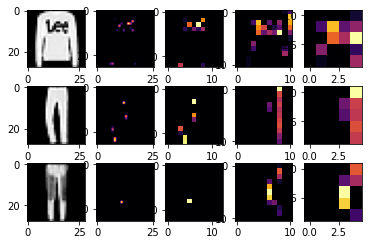

In [6]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,5)
FIRST_IMAGE=1
SECOND_IMAGE=2
THIRD_IMAGE=3
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

axarr[0,0].imshow(test_images[FIRST_IMAGE][:,:,0],'gray')
axarr[0,0].grid(False)
axarr[1,0].imshow(test_images[SECOND_IMAGE][:,:,0],'gray')
axarr[1,0].grid(False)
axarr[2,0].imshow(test_images[THIRD_IMAGE][:,:,0],'gray')
axarr[2,0].grid(False)

for x in range(1,5):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x-1]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x-1]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x-1]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)